# Coronavirus Comparison
A simple Python script to compare the emergence of COVID-19 cases in different countries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importnb import Notebook
with Notebook(): 
    import coronavirus_data

## Get data for a number of places and do some pre-processing

In [2]:
places = ['Germany', 'Italy', 'Netherlands', 'Poland']
dataset = [np.array(coronavirus_data.get_series(place, 'Confirmed')) for place in places]
index = np.arange(len(dataset[0]))
average = np.average(dataset, axis=0)

## Determine shift in days between places

In [3]:
shifts = np.array([])
for i in range(len(dataset)):
    x = np.array([])
    # test shift to the left
    for j in index:
        x = np.append(x, sum((dataset[i][j:] - average[:len(index) - j]) ** 2))
    y = np.array([])
    # test shift to the right
    for j in index:
        y = np.append(y, sum((average[j:] - dataset[i][:len(index) - j]) ** 2))
    # check if shift is to the left or the right
    if np.min(x) <= np.min(y):
        shift = np.argmin(x)
    else:
        shift = -np.argmin(y)
    shifts = np.append(shifts, shift)

## Plot shifted curves

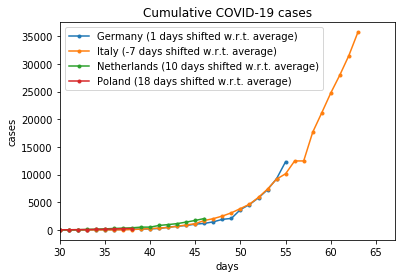

In [4]:
fig, ax = plt.subplots()
plt.title('Cumulative COVID-19 cases')
label = '{} ({} days shifted w.r.t. average)'
for i in range(len(dataset)):
    plt.plot(index - shifts[i], dataset[i], marker='.',
             label=label.format(places[i], int(shifts[i])))
plt.xlabel('days')
plt.ylabel('cases')
ax.set_xlim(30)
plt.legend()
plt.show()